<center><font size=5> Challenge Exploratory Data Analysis of the Breast Cancer Wisconsin Dataset</font></center>

***
**Author**:  Ladj Waniss

**Date**: 24th October, 2025  

**Table of Contents**
- <a href='#intro'>1. Project Overview and Objectives</a>  
  - <a href='#dataset'>1.1. Dataset Description</a>  
  - <a href='#context'>1.2. Why Breast Cancer Analysis Matters</a>  

- <a href='#basic'>2. Basic Understanding</a>  
  - <a href='#load'>2.1. Data Loading and Structure</a>  
  - <a href='#columns'>2.2. Feature Types and Column Information</a>  
  - <a href='#missing'>2.3. Missing Values Analysis</a>  

- <a href='#viz'>3. Data Visualization & Insights</a>  
  - <a href='#dist'>3.1. Feature Distribution Analysis</a>  
  - <a href='#relation'>3.2. Feature Relationships & Correlations</a>  
  - <a href='#compare'>3.3. Malignant vs Benign Comparisons</a>  

- <a href='#concl'>4. Final Observations & Insights</a>

# 1-Basic undestanding :

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# 1. Loading the dataset :
df=pd.read_csv('data.csv')

# Shape of the data:
print(df.shape)

# The first few rows of the data:
print(df.head())


(569, 33)
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  

### 2. Dataset Feature Descriptions

- **id**: Unique identifier for each patient/sample.  
- **diagnosis**: Tumor classification — `M` = malignant, `B` = benign.

#### Mean (average) measurements of the tumor
- **radius_mean**: Mean distance from center to perimeter.  
- **texture_mean**: Average variation in gray-scale pixel intensity.  
- **perimeter_mean**: Mean perimeter length of the tumor boundary.  
- **area_mean**: Mean area of the tumor.  
- **smoothness_mean**: Average local variation in radius length (surface smoothness).  
- **compactness_mean**: Mean of (perimeter² / area - 1.0).  
- **concavity_mean**: Mean severity of concave portions of the contour.  
- **concave points_mean**: Mean number of concave boundary points.  
- **symmetry_mean**: Average symmetry of the tumor shape.  
- **fractal_dimension_mean**: Mean complexity of the boundary.

#### Standard error (variation) of the same features
- **radius_se**: Standard error of radius.  
- **texture_se**: Standard error of texture.  
- **perimeter_se**: Standard error of perimeter.  
- **area_se**: Standard error of area.  
- **smoothness_se**: Standard error of smoothness.  
- **compactness_se**: Standard error of compactness.  
- **concavity_se**: Standard error of concavity.  
- **concave points_se**: Standard error of concave points.  
- **symmetry_se**: Standard error of symmetry.  
- **fractal_dimension_se**: Standard error of fractal dimension.

#### “Worst” (largest) values observed in the tumor
- **radius_worst**: Largest observed radius.  
- **texture_worst**: Largest observed texture variation.  
- **perimeter_worst**: Largest observed perimeter value.  
- **area_worst**: Largest observed tumor area.  
- **smoothness_worst**: Worst (highest) smoothness value.  
- **compactness_worst**: Worst compactness value.  
- **concavity_worst**: Worst concavity value.  
- **concave points_worst**: Worst count of concave points.  
- **symmetry_worst**: Worst symmetry score.  
- **fractal_dimension_worst**: Highest fractal dimension observed.

#### We have 29 features

### 3- Data type

In [40]:
df.dtypes
# there is one categorical feature and all the others are numerical features


id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

### 4- Column rename:

In [41]:
# Printing the column names:
df.columns.tolist()

# Renaming any column from the data base
df.rename(columns={'id':'tumor_id'})

tumor_id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4

### 5- Missing values: 

In [4]:
# Missing values:

df.isnull().sum()
# there is no missing values

# If we had missing values we would use imputation method (eg. filling with the median, mean, mode,...).Else, if we have more than 3 columns we use drop method.


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

### 6- Indexing and selection: 

In [43]:
df.iloc[232]

id                         88203002
diagnosis                         B
radius_mean                   11.22
texture_mean                  33.81
perimeter_mean                70.79
area_mean                     386.8
smoothness_mean              0.0778
compactness_mean            0.03574
concavity_mean             0.004967
concave points_mean        0.006434
symmetry_mean                0.1845
fractal_dimension_mean      0.05828
radius_se                    0.2239
texture_se                    1.647
perimeter_se                  1.489
area_se                       15.46
smoothness_se              0.004359
compactness_se             0.006813
concavity_se               0.003223
concave points_se          0.003419
symmetry_se                 0.01916
fractal_dimension_se       0.002534
radius_worst                  12.36
texture_worst                 41.78
perimeter_worst               78.44
area_worst                    470.9
smoothness_worst            0.09994
compactness_worst           

In [10]:
df.iloc[2:4]

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
2           0.1096            0.1599          0.1974               0.1279   
3           0.1425            0.2839          0.2414               0.1052   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   

   fractal_dimension_worst  Unnamed: 32  
2                  0.08758          NaN  
3                  0.17300          NaN  

[2 rows x 33 columns]

In [11]:
print(df.loc[566,'texture_mean'])

28.08


In [12]:
condition=(df['perimeter_mean'] > 100) & (df['diagnosis']=='B')
df[condition]


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
133    867387         B        15.71         13.93           102.0      761.7   
157   8711216         B        16.84         19.46           108.4      880.2   
363   9010872         B        16.50         18.29           106.6      838.1   
375    901303         B        16.17         16.07           106.3      788.5   
406    905189         B        16.14         14.86           104.3      800.0   
484    912600         B        15.73         11.28           102.8      747.2   
491  91376702         B        17.85         13.23           114.6      992.1   
508    915452         B        16.30         15.70           104.7      819.8   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
133          0.09462           0.09462         0.07135              0.05933   
157          0.07445           0.07223         0.05150              0.02771   
363          0.09686           0.08468         0.05862              0.04835   
375          0.09880           0.14380         0.06651              0.05397   
406          0.09495           0.08501         0.05500              0.04528   
484          0.10430           0.12990         0.11910              0.06211   
491          0.07838           0.06217         0.04445              0.04178   
508          0.09427           0.06712         0.05526              0.04563   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
133  ...          19.25            114.3       922.8           0.12230   
157  ...          28.07            120.3      1032.0           0.08774   
363  ...          25.45            117.2      1009.0           0.13380   
375  ...          19.14            113.1       861.5           0.12350   
406  ...          19.58            115.9       947.9           0.12060   
484  ...          14.20            112.5       854.3           0.15410   
491  ...          18.42            127.1      1210.0           0.09862   
508  ...          17.76            109.8       928.2           0.13540   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
133            0.19490           0.1709               0.13740          0.2723   
157            0.17100           0.1882               0.08436          0.2527   
363            0.16790           0.1663               0.09123          0.2394   
375            0.25500           0.2114               0.12510          0.3153   
406            0.17220           0.2310               0.11290          0.2778   
484            0.29790           0.4004               0.14520          0.2557   
491            0.09976           0.1048               0.08341          0.1783   
508            0.13610           0.1947               0.13570          0.2300   

     fractal_dimension_worst  Unnamed: 32  
133                  0.07071          NaN  
157                  0.05972          NaN  
363                  0.06469          NaN  
375                  0.08960          NaN  
406                  0.07012          NaN  
484                  0.08181          NaN  
491                  0.05871          NaN  
508                  0.07230          NaN  

[8 rows x 33 columns]

In [13]:
# Extract all malignat sample:

condition2= df['diagnosis']=='M'
df[condition2]

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
563    926125         M        20.92         25.09          143.00     1347.0   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
563          0.10990           0.22360         0.31740              0.14740   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0            0.1622   
1    ...          23.41           158.80      1956.0            0.1238   
2    ...          25.53           152.50      1709.0            0.1444   
3    ...          26.50            98.87       567.7            0.2098   
4    ...          16.67           152.20      1575.0            0.1374   
..   ...            ...              ...         ...               ...   
563  ...          29.41           179.10      1819.0            0.1407   
564  ...          26.40           166.10      2027.0            0.1410   
565  ...          38.25           155.00      1731.0            0.1166   
566  ...          34.12           126.70      1124.0            0.1139   
567  ...          39.42           184.60      1821.0            0.1650   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0               0.6656           0.7119                0.2654          0.4601   
1               0.1866           0.2416                0.1860          0.2750   
2               0.4245           0.4504                0.2430          0.3613   
3               0.8663           0.6869                0.2575          0.6638   
4               0.2050           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
563             0.4186           0.6599                0.2542          0.2929   
564             0.2113           0.4107                0.2216          0.2060   
565             0.1922           0.3215                0.1628          0.2572   
566             0.3094           0.3403                0.1418          0.2218   
567             0.8681           0.9387                0.2650          0.4087   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

### 7- Descriptive statistics:
 

In [14]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

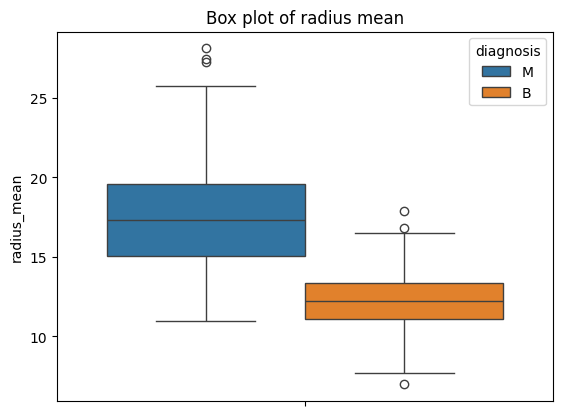

In [15]:
# Outliers or extreme values :
sns.boxplot(y='radius_mean',data=df,hue='diagnosis')
plt.title('Box plot of radius mean')
plt.show()

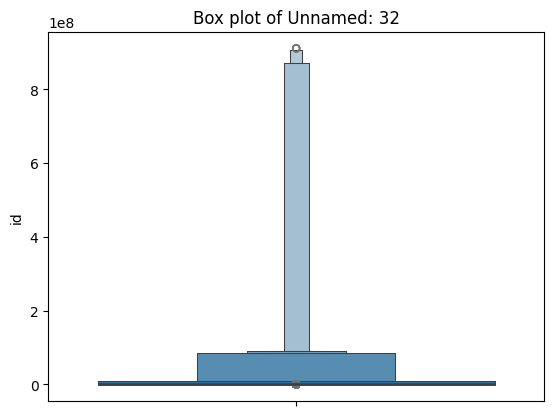

In [16]:
# box plot for each features:
num_features=df.select_dtypes(include=['float64','int64']).columns
plt.Figure(figsize=(20,15))
for i,col in enumerate(num_features):
    plt.Subplot=(8,4,i+1)
    sns.boxenplot(y=col,data=df)
    plt.title(f'Box plot of {col}')


### 8- Grouping and aggregation :
 

In [17]:
df.groupby('diagnosis').mean()

id  radius_mean  texture_mean  perimeter_mean  \
diagnosis                                                            
B          2.654382e+07    12.146524     17.914762       78.075406   
M          3.681805e+07    17.462830     21.604906      115.365377   

            area_mean  smoothness_mean  compactness_mean  concavity_mean  \
diagnosis                                                                  
B          462.790196         0.092478          0.080085        0.046058   
M          978.376415         0.102898          0.145188        0.160775   

           concave points_mean  symmetry_mean  ...  texture_worst  \
diagnosis                                      ...                  
B                     0.025717       0.174186  ...      23.515070   
M                     0.087990       0.192909  ...      29.318208   

           perimeter_worst   area_worst  smoothness_worst  compactness_worst  \
diagnosis                                                                      
B                87.005938   558.899440          0.124959           0.182673   
M               141.370330  1422.286321          0.144845           0.374824   

           concavity_worst  concave points_worst  symmetry_worst  \
diagnosis                                                          
B                 0.166238              0.074444        0.270246   
M                 0.450606              0.182237        0.323468   

           fractal_dimension_worst  Unnamed: 32  
diagnosis                                        
B                         0.079442          NaN  
M                         0.091530          NaN  

[2 rows x 32 columns]

In [18]:
columns=['symmetry_mean','texture_mean','area_mean','concavity_mean']
df.groupby('diagnosis')[columns].max()

symmetry_mean  texture_mean  area_mean  concavity_mean
diagnosis                                                        
B                 0.2743         33.81      992.1          0.4108
M                 0.3040         39.28     2501.0          0.4268

## Direct questions :

In [19]:
# Question 1 : 
# The most frequently occurring value in diagnosis column:

print("The most frequently occurring value in diagnosis column is :", df['diagnosis'].mode()[0])

# Question 2 : 
# The kind of data stored in area_error column :
print("The kind of data stored in area_error column is :",df['area_se'].dtype)

# Question 3 : 
# The higher average "mean_radius" for malignant tumors compare to benign tumors:

average_for_M=df[df['diagnosis'] == 'M']['radius_mean'].mean()
average_for_B=df[df['diagnosis'] == 'B']['radius_mean'].mean()
higher_average=(average_for_M-average_for_B)/(average_for_M)*100
print(f"Average radius is {higher_average:.2f}% higher for malignant tumors.")



The most frequently occurring value in diagnosis column is : B
The kind of data stored in area_error column is : float64
Average radius is 30.44% higher for malignant tumors.


In [20]:
# Question 4 : 
# The feature with the lowest standard deviation:
feature_columns = df.columns.drop(['id', 'diagnosis', 'Unnamed: 32']).tolist()

dev=df[feature_columns].std().sort_values(ascending=True)
print("The lowest standard deviation is :",dev.index[0],df[feature_columns].std().sort_values()[0])

# Question 5 : 
# Calculate the total tumor with a "worst perimeter" value greate than 100:

condition=df['perimeter_worst'] > 100
#total=df[condition].shape[0]
total=condition.sum()
print("the total tumor with a worst perimeter value greate than 100 is :",total)


The lowest standard deviation is : fractal_dimension_se 0.002646070967089195
the total tumor with a worst perimeter value greate than 100 is : 263


/var/folders/sy/8w5y_0cx5x7b1_bqh_s1zv3r0000gn/T/ipykernel_3871/1869644122.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("The lowest standard deviation is :",dev.index[0],df[feature_columns].std().sort_values()[0])


# 2-Visualization :

### 1. Distributin of features :
 

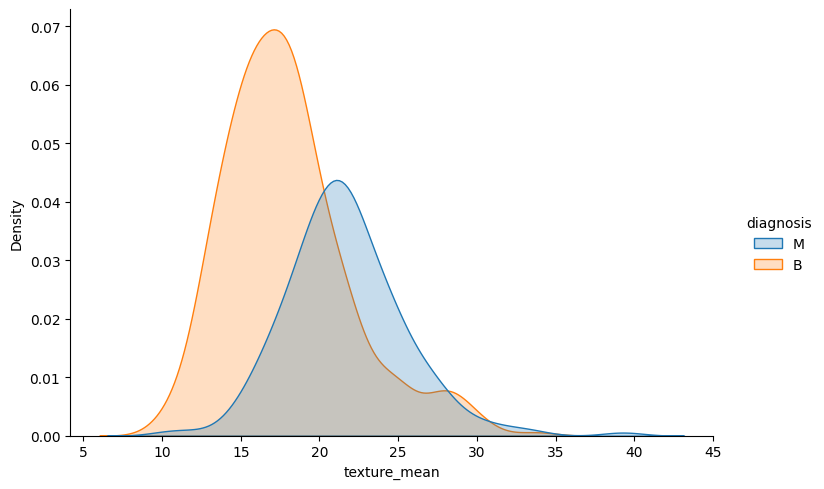

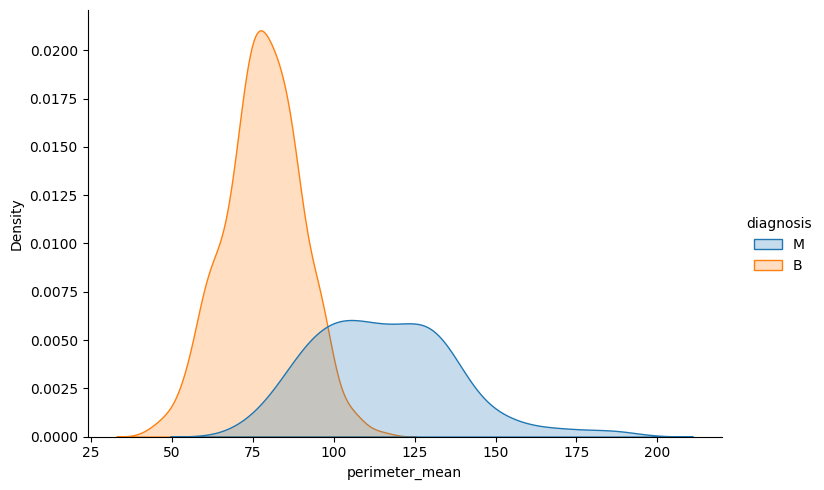

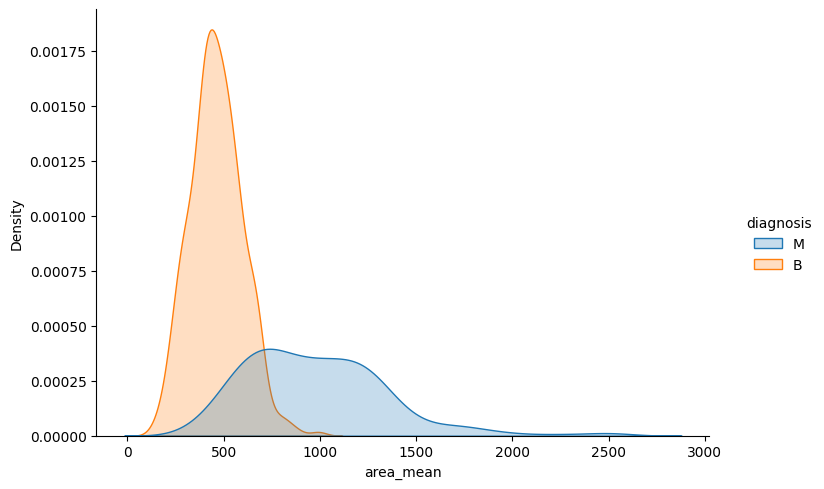

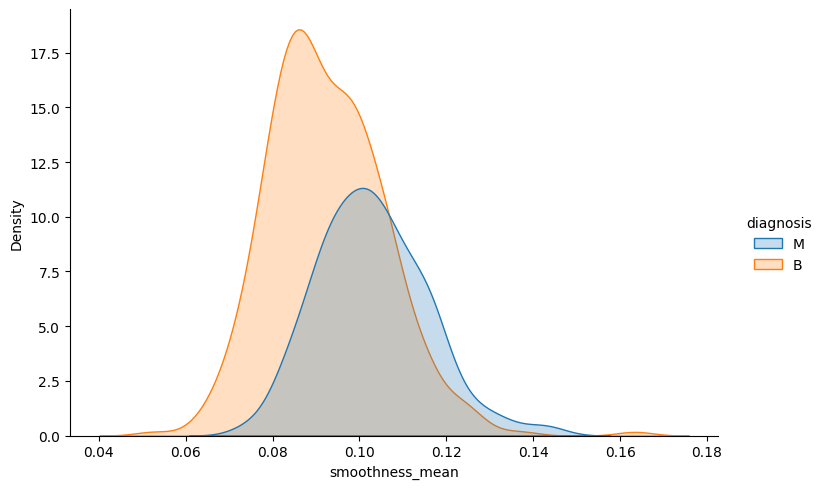

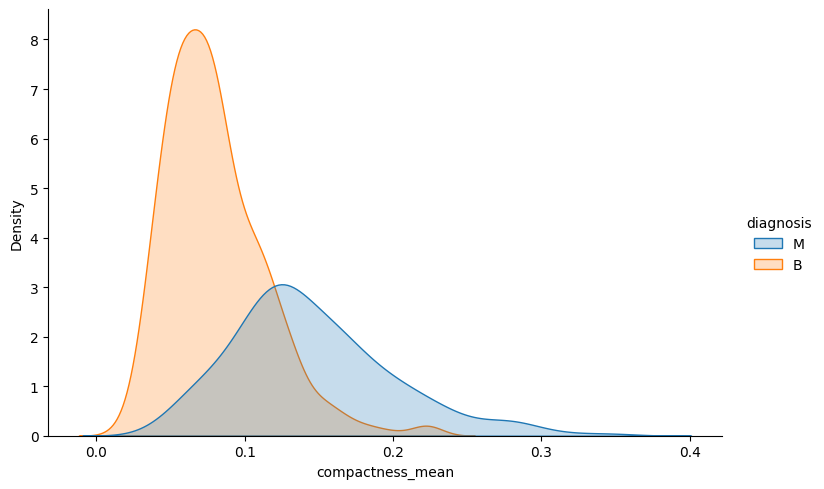

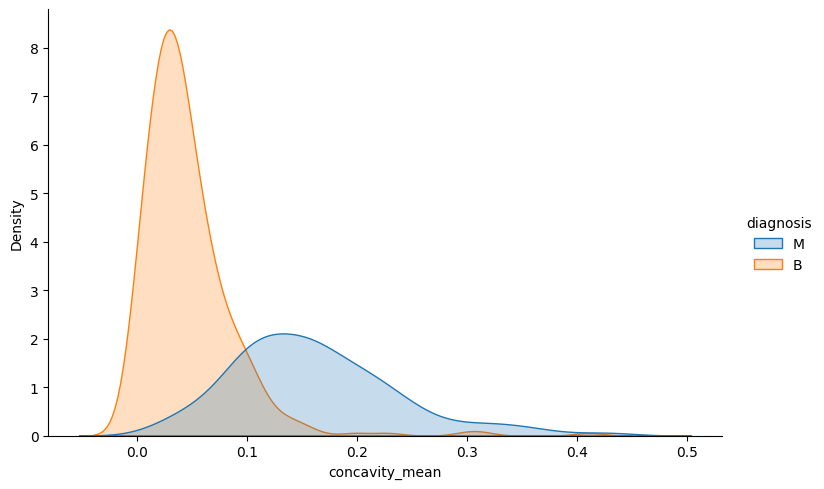

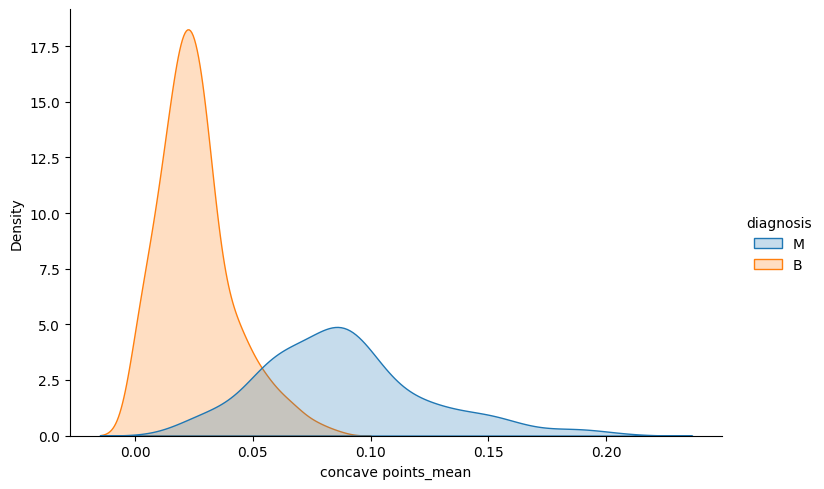

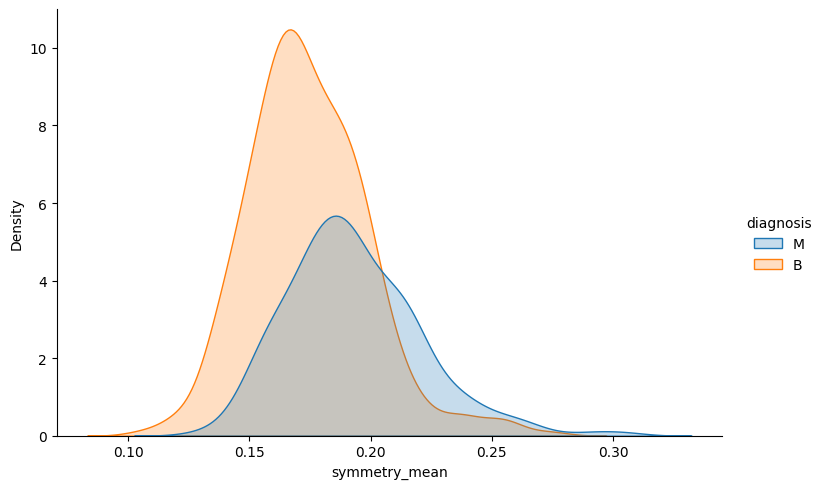

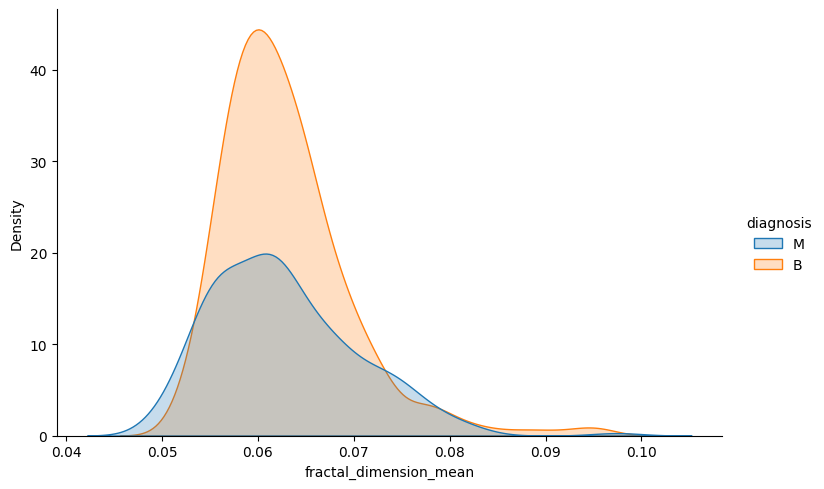

In [21]:
columns=['texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean']
# create kernel density estimation plots for the selected columns with seaborn
for col in columns:
    sns.displot(data=df, x=col, kind='kde',hue='diagnosis', fill=True, height=5,aspect=1.5)
    plt.show()

### 3. Relationship between Diagnosis and specific features :
 

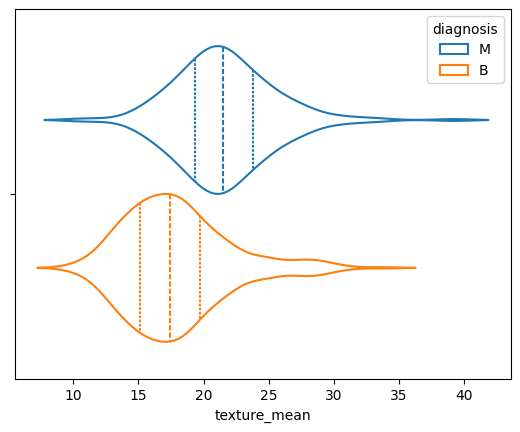

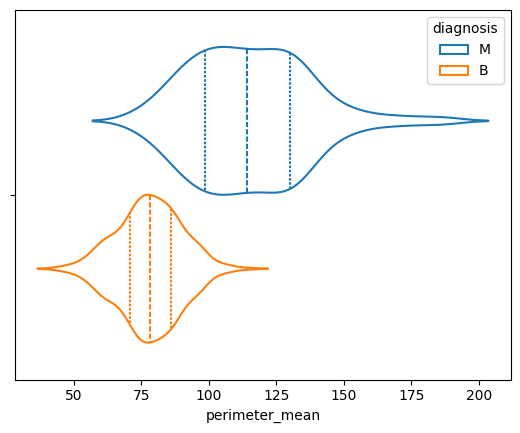

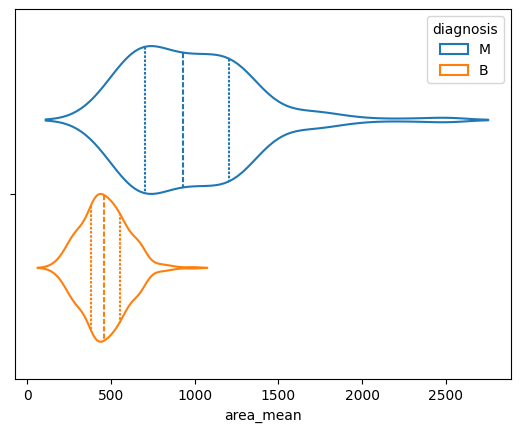

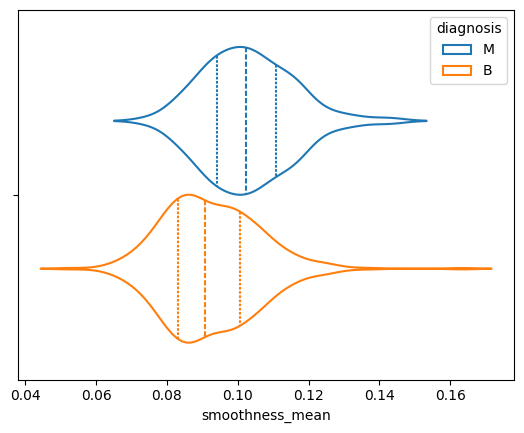

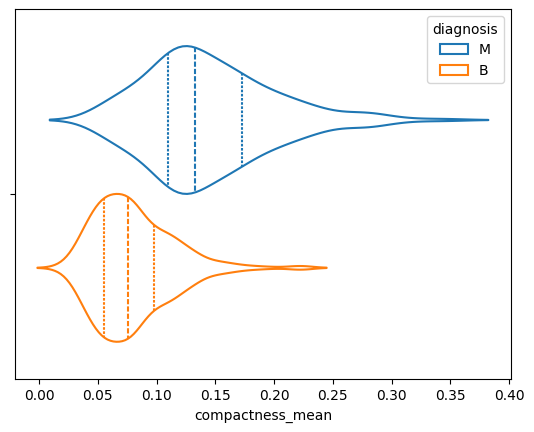

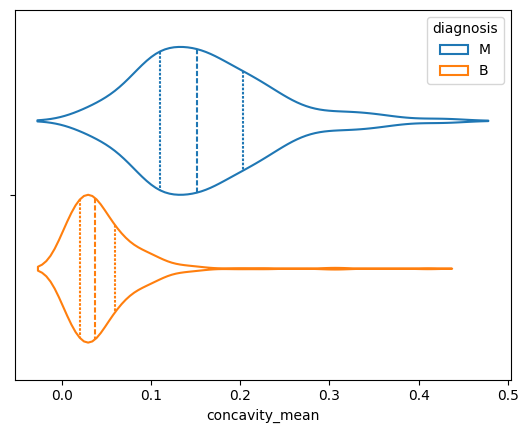

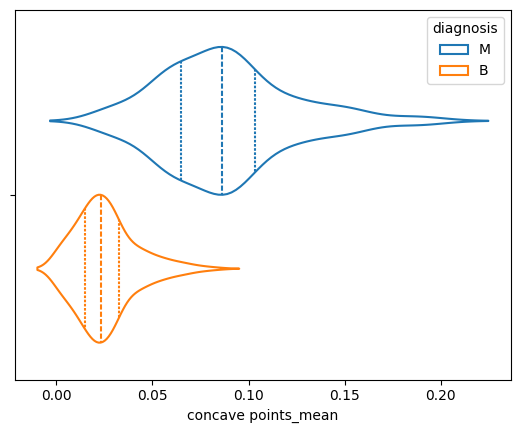

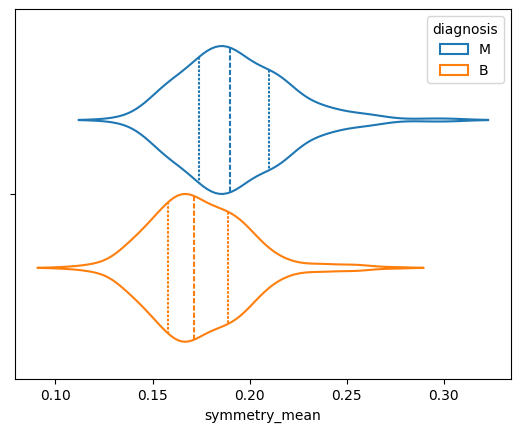

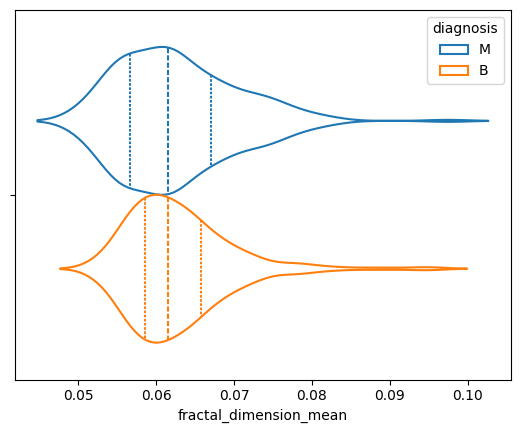

In [37]:
# Violin plot
columns=['texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean']
for col in columns:
    sns.violinplot(data=df,x=col,hue='diagnosis',fill=False,inner='quart')
    plt.show()

### 4. Feature importances:

In [ ]:
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})

/var/folders/sy/8w5y_0cx5x7b1_bqh_s1zv3r0000gn/T/ipykernel_13460/2339125054.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='coolwarm')


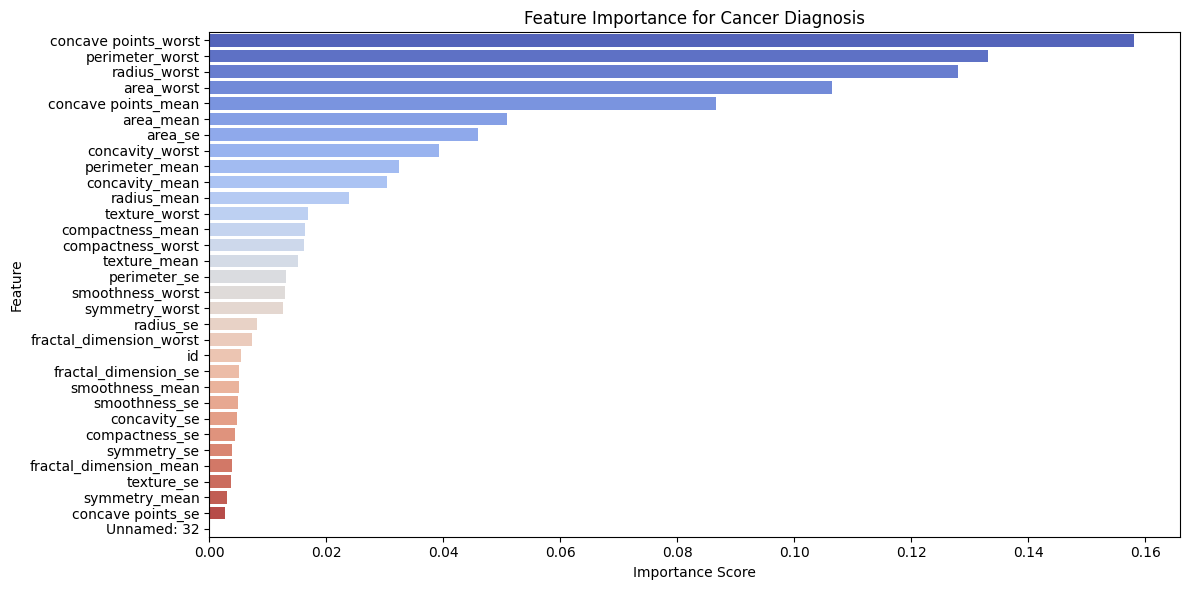

In [5]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Assume df is your full dataset and it includes 'diagnosis' as the target
X = df.drop(columns=['diagnosis'])  # drop non-feature columns
y = df['diagnosis']

#Train a basic model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

#Get feature importances
importances = model.feature_importances_  #feature_importances

#Create a DataFrame for plotting
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

#Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

#Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='coolwarm')
plt.title('Feature Importance for Cancer Diagnosis')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### 5. Subsetting and categorical features:

In [20]:
df['symmetry_worst']=pd.qcut(df['symmetry_worst'],q=4,labels=['low','medium','high','very high'])
sns.pointplot(data=df, x="symmetry_worst", y="radius_mean", hue="diagnosis",palette='viridis')
plt.title("symmetry_worst vs radius_mean")
plt.show()

ValueError: Bin edges must be unique: CategoricalIndex([0.0, 0.0, 1.0, 2.0, 3.0], categories=[0.0, 1.0, 2.0, 3.0], ordered=False, dtype='category', name='symmetry_worst').
You can drop duplicate edges by setting the 'duplicates' kwarg

### Additional tips : Explore interactive visualization with plotly

In [ ]:
# Variation of the perimeter worst for "both" tumor id:

import plotly.express as px

fig = px.bar(df, x="diagnosis", y="perimeter_worst", color="diagnosis", animation_frame="id", range_y=[0,300])
fig.show()

In [ ]:
# Variation of the perimeter worst for "benign" tumor id:

import plotly.express as px
df_maligne = df[df['diagnosis'] == 'B']

fig = px.bar(df_maligne, x="diagnosis", y="perimeter_worst", color="diagnosis", animation_frame="id", range_y=[0,300])
fig.show()

In [14]:
# Variation of the perimeter worst for "malignant" tumor id:

import plotly.express as px
df_maligne = df[df['diagnosis'] == 'M']
fig = px.bar(df_maligne, x="diagnosis", y="perimeter_worst", color="diagnosis", animation_frame="id", range_y=[0,300],color_discrete_sequence=['green'])
fig.show()

In [11]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Violin(
    x=['M']*len(df[df['diagnosis']=='M']),
    y=df['radius_mean'][df['diagnosis']=='M'],
    name='Malignant',
    side='negative',
    box_visible=True,
    points='all'
))

fig.add_trace(go.Violin(
    x=['B']*len(df[df['diagnosis']=='B']),
    y=df['radius_mean'][df['diagnosis']=='B'],
    name='Benign',
    side='positive',
    box_visible=True,
    points='all'
))

fig.update_layout(violinmode='overlay')
fig.show()

In [16]:
import plotly.express as px
fig = px.line_polar(df, r="perimeter_mean", theta="symmetry_worst", color="diagnosis", line_close=True,
                    color_discrete_sequence=px.colors.sequential.Plasma_r,
                    template="plotly_dark",)
fig.show()

In [17]:
import plotly.express as px
fig = px.box(df, y="radius_mean",color="diagnosis")
fig.show()


In [19]:
feature_columns = df.columns.drop(['id', 'diagnosis', 'Unnamed: 32']).tolist()
color_discrete_map = {
    'B': 'blue',    
    'M': 'pink' 
}

import plotly.express as px
import plotly.io as pio
# desactiver l'ouverture automatique du navigateur et afficher sur jupyter lab
pio.renderers.default = "notebook"

fig = px.scatter_matrix(df,
    dimensions=feature_columns[:5],
    color="diagnosis",
    color_discrete_map=color_discrete_map,
    height=800) 
fig.show()